In [42]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('ins.csv')

In [32]:
df

,Age,Income,Spending,Insurance
0,25,72,40,Life
1,54,35,20,Health
2,23,40,28,Life
3,36,58,30,Health
4,41,61,41,Health


In [33]:
x= df.drop('Insurance',axis='columns')

In [34]:
y=df['Insurance']

In [35]:
model = KNeighborsClassifier(n_neighbors=3)

In [36]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [37]:
model.predict([[28,60,29]])

C:\Users\Ses-13\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Health'], dtype=object)

In [38]:
df['pred']=model.predict(x)

In [39]:
df

,Age,Income,Spending,Insurance,pred
0,25,72,40,Life,Health
1,54,35,20,Health,Health
2,23,40,28,Life,Health
3,36,58,30,Health,Health
4,41,61,41,Health,Health


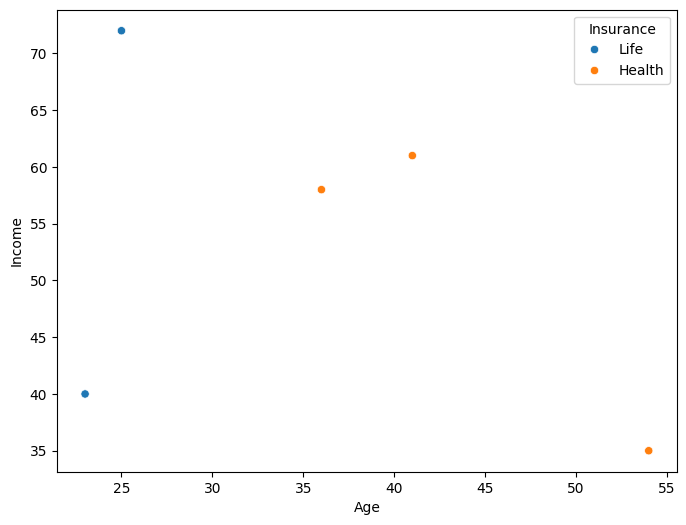

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Insurance')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

How does K-NN work?


Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm =confusion_matrix(df['Insurance'], df['pred'])
cm

array([[3, 0],
       [2, 0]], dtype=int64)

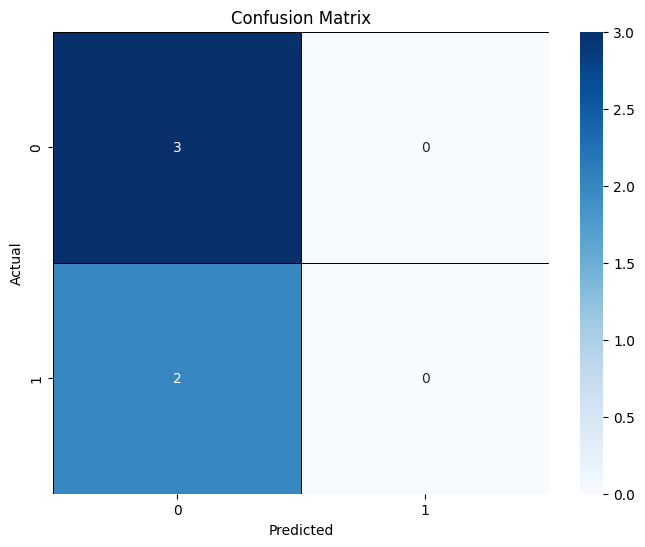

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()